## Previsão de preços BTC

In [1]:
# Importação de bibliotecas 

#Básicas
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime as dt

# Modelos estatísticos 
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA

#Incremento de data em intervalo definido
from pandas.tseries.offsets import DateOffset

#Plots gráficos
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px

#Avisos
import warnings
warnings.filterwarnings('ignore') #Desativando 'impressão' de avisos


In [2]:
#Importação do DataSet
dados = pd.read_csv("Data\Bitcoin.csv")

- Visualização Inicial dos Dados

In [3]:
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
dados.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2683.0,1.098990e+04,1.590262e+04,1.768970e+02,6.017780e+02,6.235030e+03,1.031664e+04,6.754973e+04
High,2683.0,1.128663e+04,1.633195e+04,2.117310e+02,6.067070e+02,6.371550e+03,1.049561e+04,6.878962e+04
Low,2683.0,1.066296e+04,1.540807e+04,1.715100e+02,5.960480e+02,6.093670e+03,1.006754e+04,6.638206e+04
Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Adj Close,2683.0,1.100358e+04,1.590816e+04,1.781030e+02,6.027335e+02,6.238050e+03,1.031794e+04,6.756683e+04
Volume,2683.0,1.459304e+10,2.008458e+10,5.914570e+06,7.839140e+07,4.999240e+09,2.445092e+10,3.509679e+11


- Limpeza dos Dados

In [22]:
# Inserindo no novo Dataframe apenas colunas selecionadas
df = dados.iloc[:,[0,-2]]
#Renomeando colunas
df.columns = ['Date', 'Price']
#Convertendo coluna date para tipo time
df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
#definindo coluna 'Date' como index
df.set_index('Date', inplace=True)
#Criando cópia do DF por segurança ***(Quando deep=True, as alterações na cópia não serão refletidas no original)
df_seg = df.copy(deep=True)

display(df.tail(10))

print('\n\033[1mInfo: \033[0m Dataset contém {} amostras'.format(df.shape[0]))


,Price
Date,
2022-01-11,42735.855469
2022-01-12,43949.101563
2022-01-13,42591.570313
2022-01-14,43099.699219
2022-01-15,43177.398438
2022-01-16,43113.878906
2022-01-17,42250.550781
2022-01-18,42375.632813
2022-01-19,41744.328125



Info:  Dataset contém 2683 amostras


In [6]:
#Plotagem gráfica com Plotly
fig = px.area(df, title ="Variação de preço 2015 até 2022", labels=dict( Date="Data", value="Preço ($)", variable="Legenda"))
fig.show()

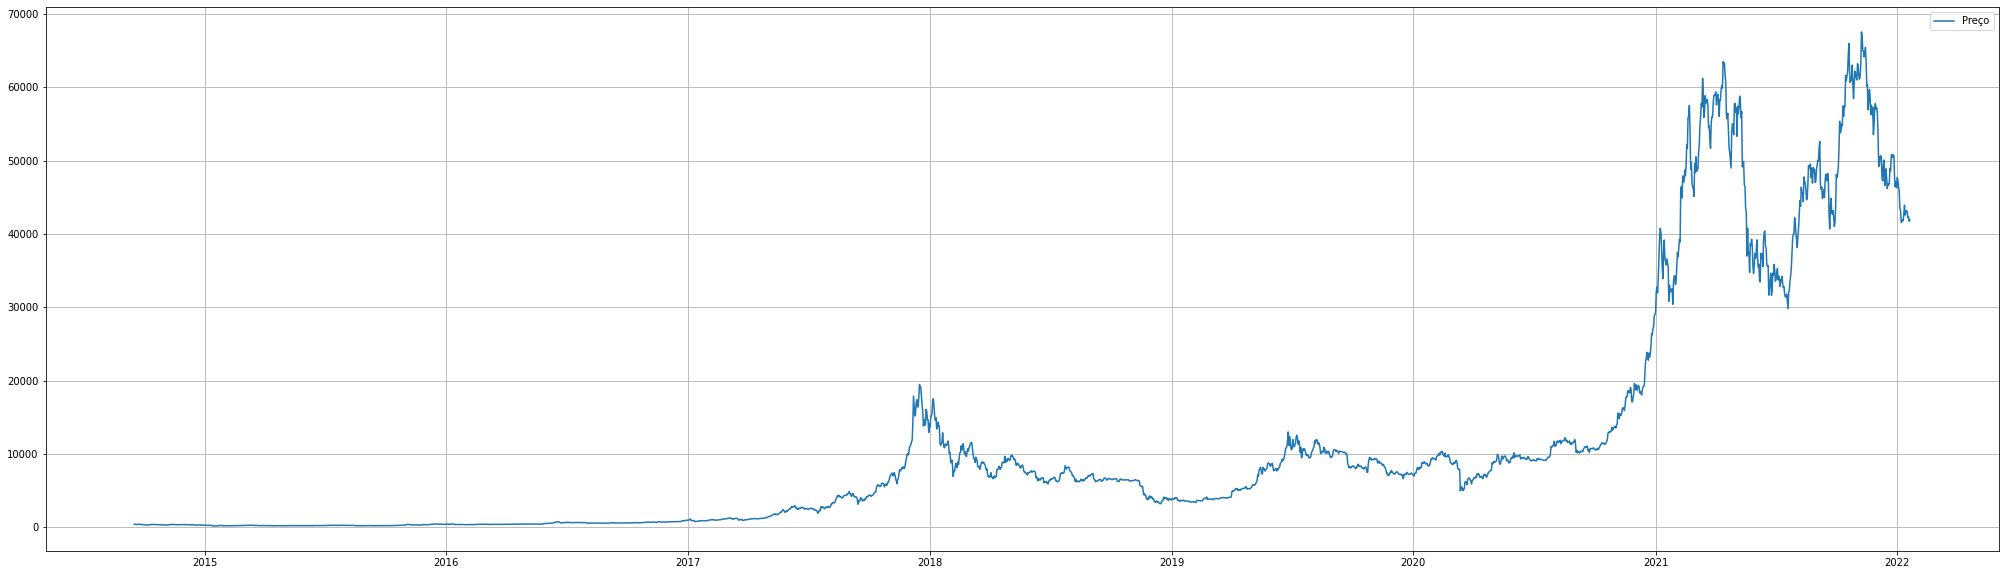


Análise:  Nota-se uma clara tendência de alta no preço da criptomoeda com alguma sazonalidade (** Sazonalidade = Variações que ocorrem em intervalos regulares).


In [7]:
#Plotagem gráfica com Matplotlib 
plt.figure(figsize=(35,10))
plt.plot(df, label="Preço")
plt.grid()
plt.legend()
plt.show()

print('\n\033[1mAnálise: \033[0m Nota-se uma clara tendência de alta no preço da criptomoeda com alguma sazonalidade (** Sazonalidade = Variações que ocorrem em intervalos regulares).')

### Verificação de Estacionariedade
- Validação visual por meio de gráfico e estatístico

    - Validação Estatística
        -  Utilizando o teste Dickey-Fuller, que consiste em : Validar se o modelo possui raiz unitária (Se obtiver-mos |L| < 1, Indica que a série é explosiva. Ou seja, não estacionária) podemos identificar a aleatoriedade dos dados.
            - Para que a série seja estacionária, o parâmetro Φ esteja entre -1 e 1.
        - Valor de P:
            - É a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula    
        - Lag      
            - Calcula a autocorrelação lag-N.
        - Valor Crítico
            - Teste de hipótese onde os valores críticos, são pontos sobre a distribuição da estatística de teste.    

In [8]:
def chec_estacionaria(df):    
    plt.figure(figsize=(35,10))

    plt.plot(df, label='Valor Original')
    # Cálculo de média e desvio padrão "Móveis"
    plt.plot(df.rolling(window=52).mean(), label="Média Móvel" )
    plt.plot(df.rolling(window=52).std(), label="Desvio Padrão Móvel")

    plt.grid()
    plt.legend()
    plt.show()  

    adf = adfuller(df)
    padf = pd.Series(adf[:4], index=['Estatística T:', 'Valor de P:', '#Lag:', 'Observações usadas:'])
    for k,v in adf[4].items():
        padf['Valor Crítico {}:'.format(k)] = v

    print(padf)   

    print("------------------------Resultado------------------------")
    if (padf[4] < padf[0]):
        print("Série explosiva. Valor de Estatística-T Maior que valores críticos. "  )

    elif((padf[4] > padf[0]) & (padf[5] < padf[0]) ):
        print('---Série com Estatística-T menor que Valor crítico 1%.')     

    elif((padf[5] > padf[0]) & (padf[6] < padf[0]) ):
        print('---Série com Estatística-T menor que Valor crítico 5%.')    

    elif (padf[6] > padf[0]):
        print("---Série com Estatística-T menor que ambos valores críticos ")    

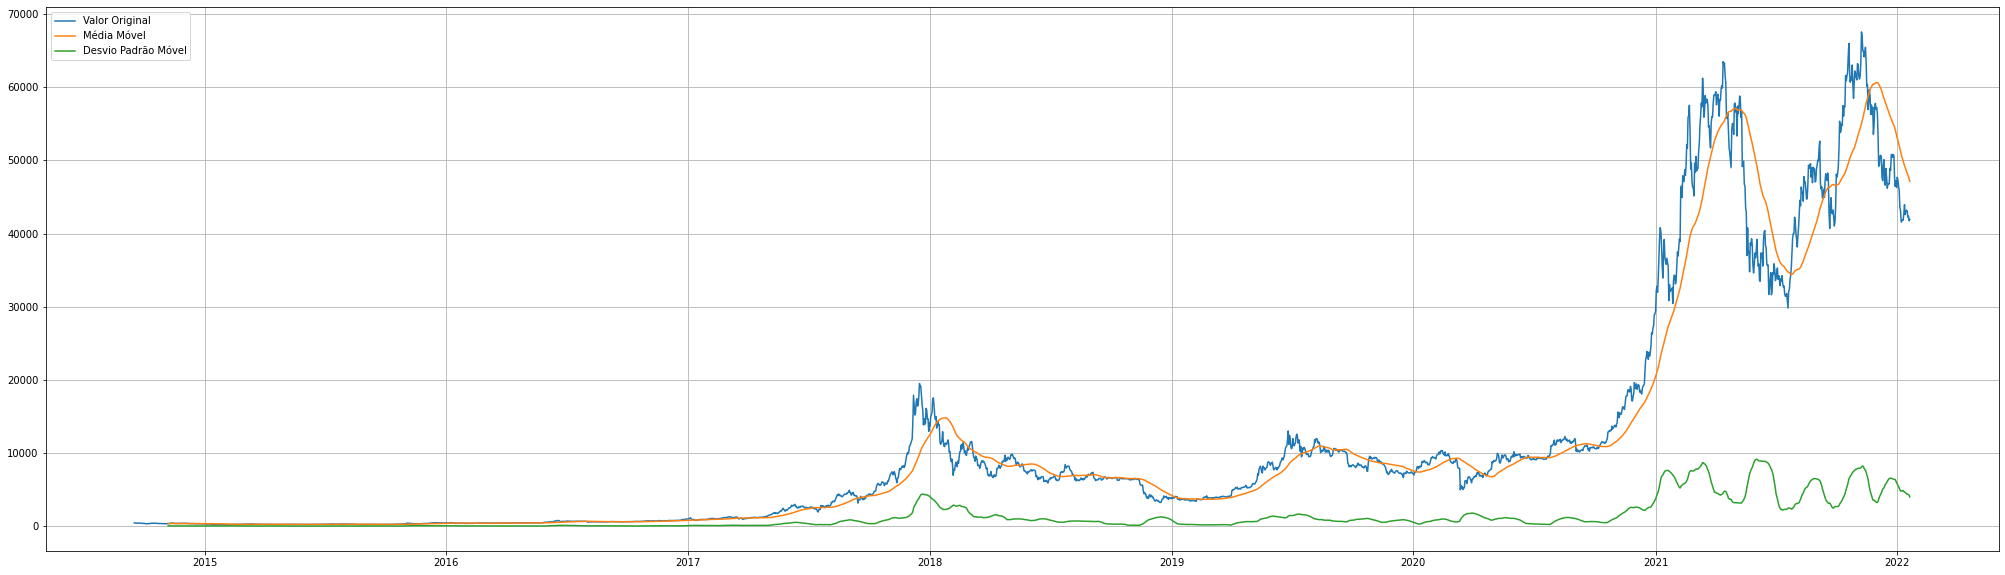

Estatística T:           -1.138159
Valor de P:               0.699617
#Lag:                    28.000000
Observações usadas:    2654.000000
Valor Crítico 1%:        -3.432816
Valor Crítico 5%:        -2.862630
Valor Crítico 10%:       -2.567350
dtype: float64
------------------------Resultado------------------------
Série explosiva. Valor de Estatística-T Maior que valores críticos. 


In [9]:
chec_estacionaria(df)

### Validação Estatística
    - Para que a série seja estacionária, o parâmetro a Estatística T tem que ser menor que o valor Crítico.
    - Valor de P:
        - É a probabilidade de se obter uma estatística de teste igual ou mais extrema que aquela observada em uma amostra, sob a hipótese nula    
    - Lag      
        - Calcula a autocorrelação lag-N.
    - Valor Crítico
        - Teste de hipótese onde os valores críticos, são pontos sobre a distribuição da estatística de teste.    

##### -------------------------------------- 
##### Análise dos dados obtidos:
- Como:
    - A estatística T, é maior que o valor crítico;
    - A média móvel não é constante ao longo do tempo;
- Então: 
    - Isso implica diretamente que a série temporal NÃO é estacionária.
##
- Vamos corrigir isso decompondo usando Média Móvel       
##### -------------------------------------- 

### -Decomposição usando média móvel

- Quando os dados não tem distribuição normal e não apresentam homogeniedade de variância faz-se o logarítimo desses dados pois é bem comum que passem a ter distribuição normal ou se tornem homogeneos

In [10]:
#Logarítimo Natural
lna = np.log(df)

#Média Móvel e desvio padrão em cima dos dados de Log Natural
mm = lna.rolling(window=5).mean()
dp = lna.rolling(window=5).std()

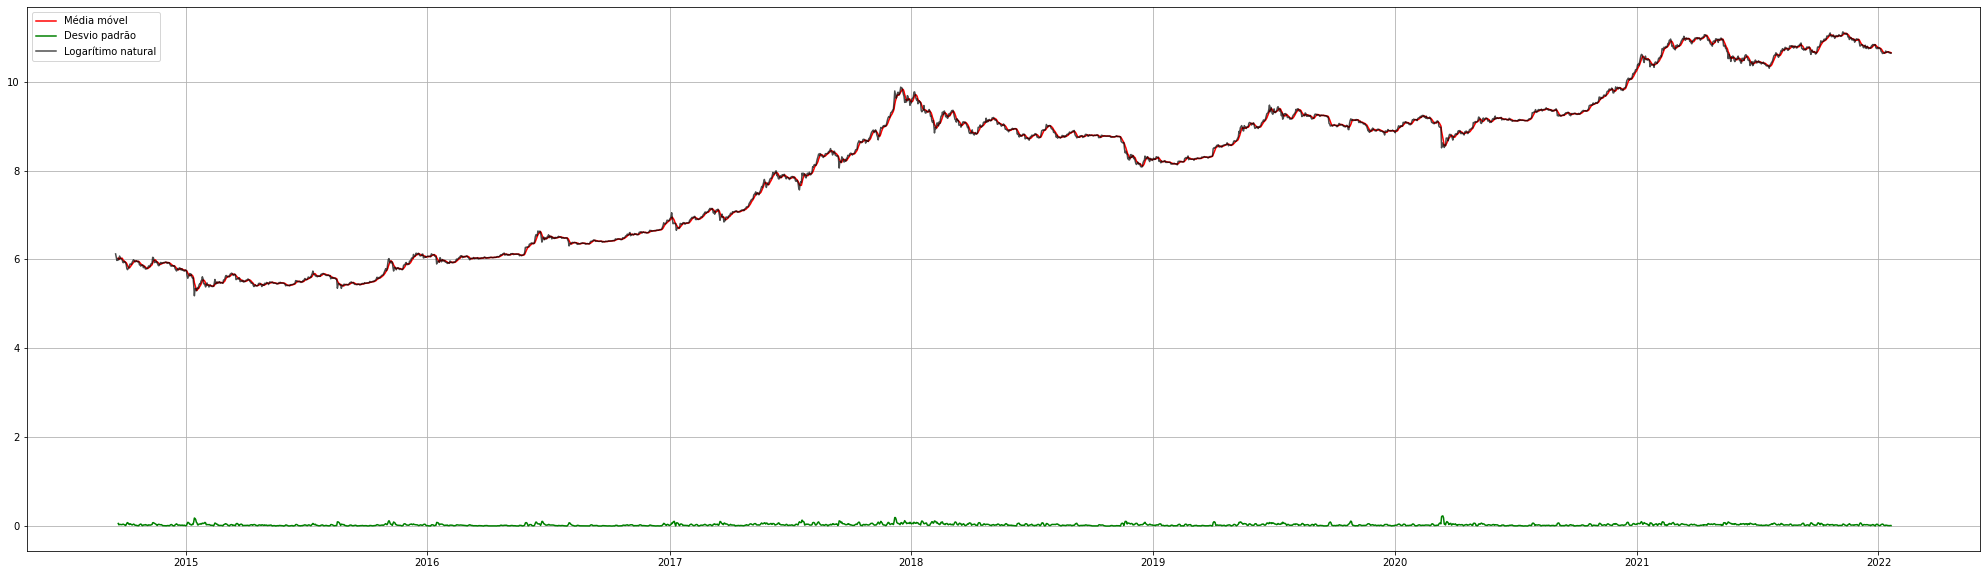

In [11]:
# Plotando informações 
plt.figure(figsize=(35,10))
plt.plot(mm, c='r', label='Média móvel')
plt.plot(dp, c='g', label='Desvio padrão')
plt.plot(lna, c='black', alpha= 0.7 , label='Logarítimo natural')

plt.grid()
plt.legend()
plt.show()

- Utilizando função de checagem de estacionaridade em decomposição

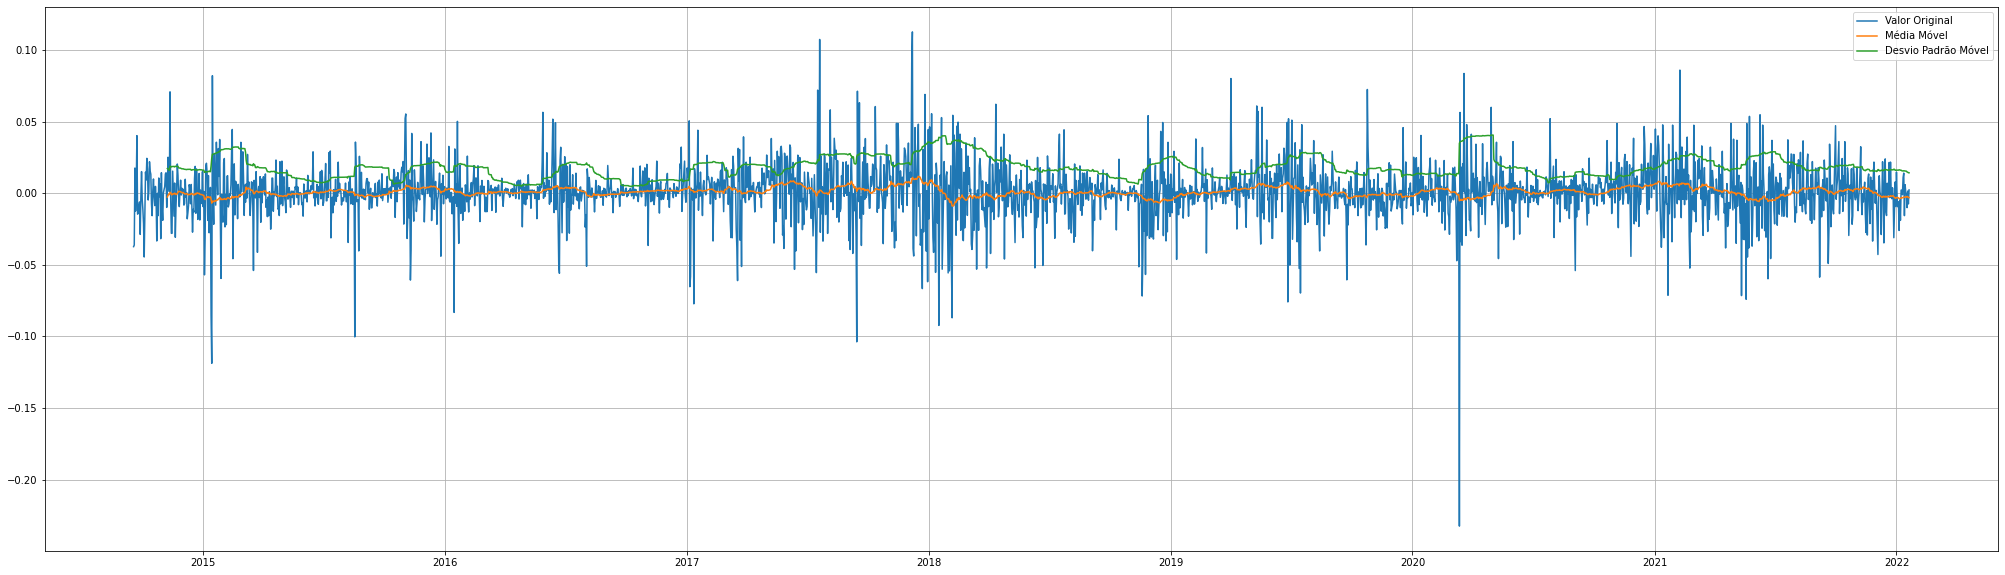

Estatística T:        -1.554228e+01
Valor de P:            2.151715e-28
#Lag:                  9.000000e+00
Observações usadas:    2.672000e+03
Valor Crítico 1%:     -3.432800e+00
Valor Crítico 5%:     -2.862622e+00
Valor Crítico 10%:    -2.567346e+00
dtype: float64
------------------------Resultado------------------------
---Série com Estatística-T menor que ambos valores críticos 


In [12]:
# Média Móvel
mm = lna.rolling(window=2, center=False).mean()

#Logarítimo Natural
lnamm = lna - mm
lnamm = lnamm.dropna()

chec_estacionaria(lnamm)

### Como notado, a Estatística-T tem valor menor que o valor crítico. Indicando assim que a série é estacionária e podemos criar nosso modelo ARIMA.

- Encontrando parâmetros 'p' e 'q' por meio da função de Auto-correlação e Auto-correlação parcial

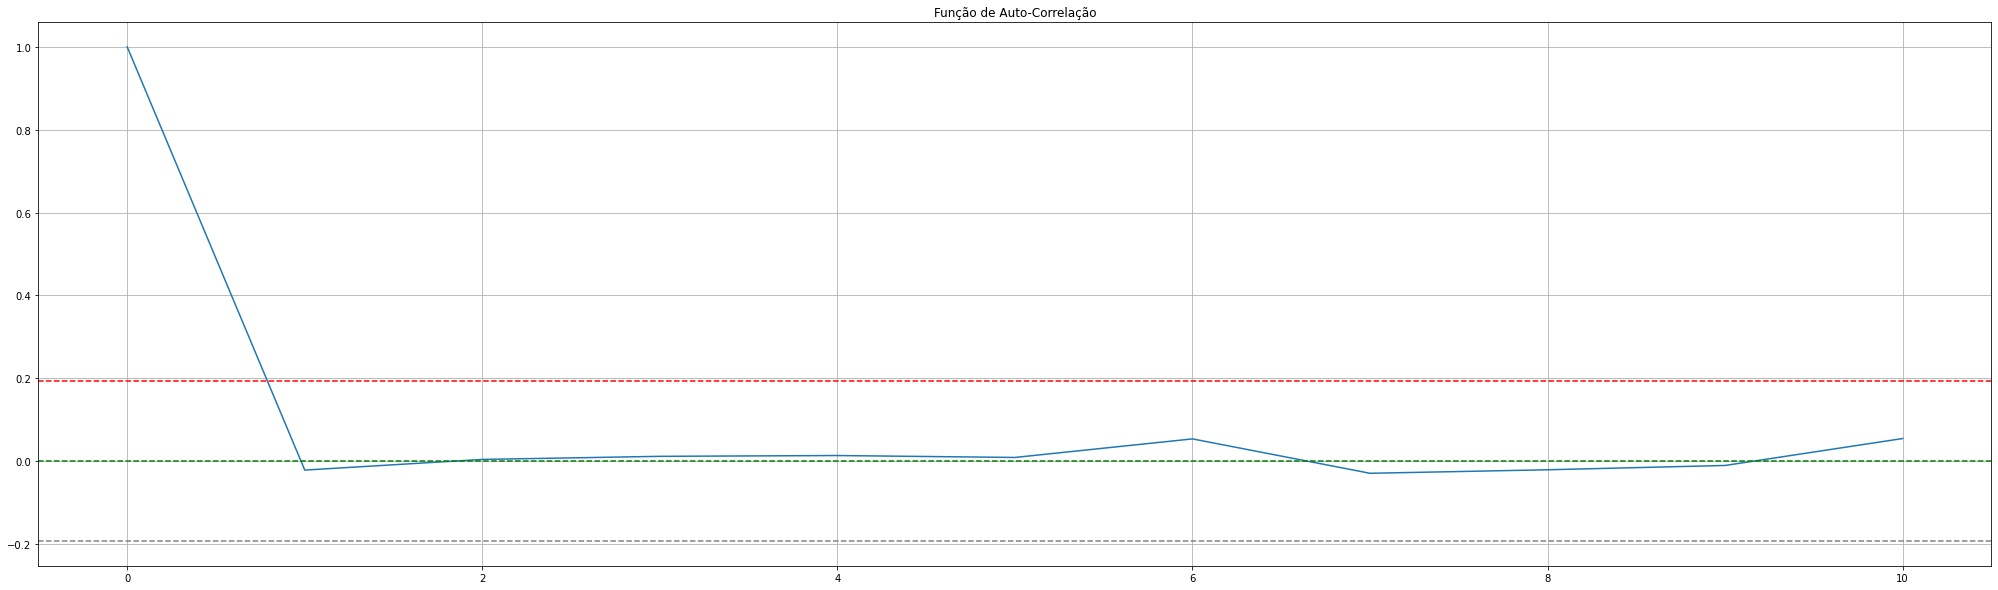

In [13]:
#Plot de Função de Auto-Correlação 

plt.figure(figsize=(35,10))

# Calculando a função de Auto-Correlação
plt.plot(np.arange(acf(lnamm, nlags=10, fft=True).shape[0]), acf(lnamm, nlags=10,fft=True))

# Valor de Confiança Superior
plt.axhline(y=0, linestyle='--', c='green')
#Inferior do intervalo de confiança
plt.axhline(y= -10/np.sqrt(len(lnamm)), linestyle='--', c='gray')

plt.axhline(y= 10/np.sqrt(len(lnamm)), linestyle='--', c='red')

plt.title('Função de Auto-Correlação')
plt.grid()
plt.show()


- A curva ACF passa pelo valor de confiança superior, quando o valor de defasagem está entre 5 e 6. Logo o valor ótimo de q pode ser 5 ou 6.

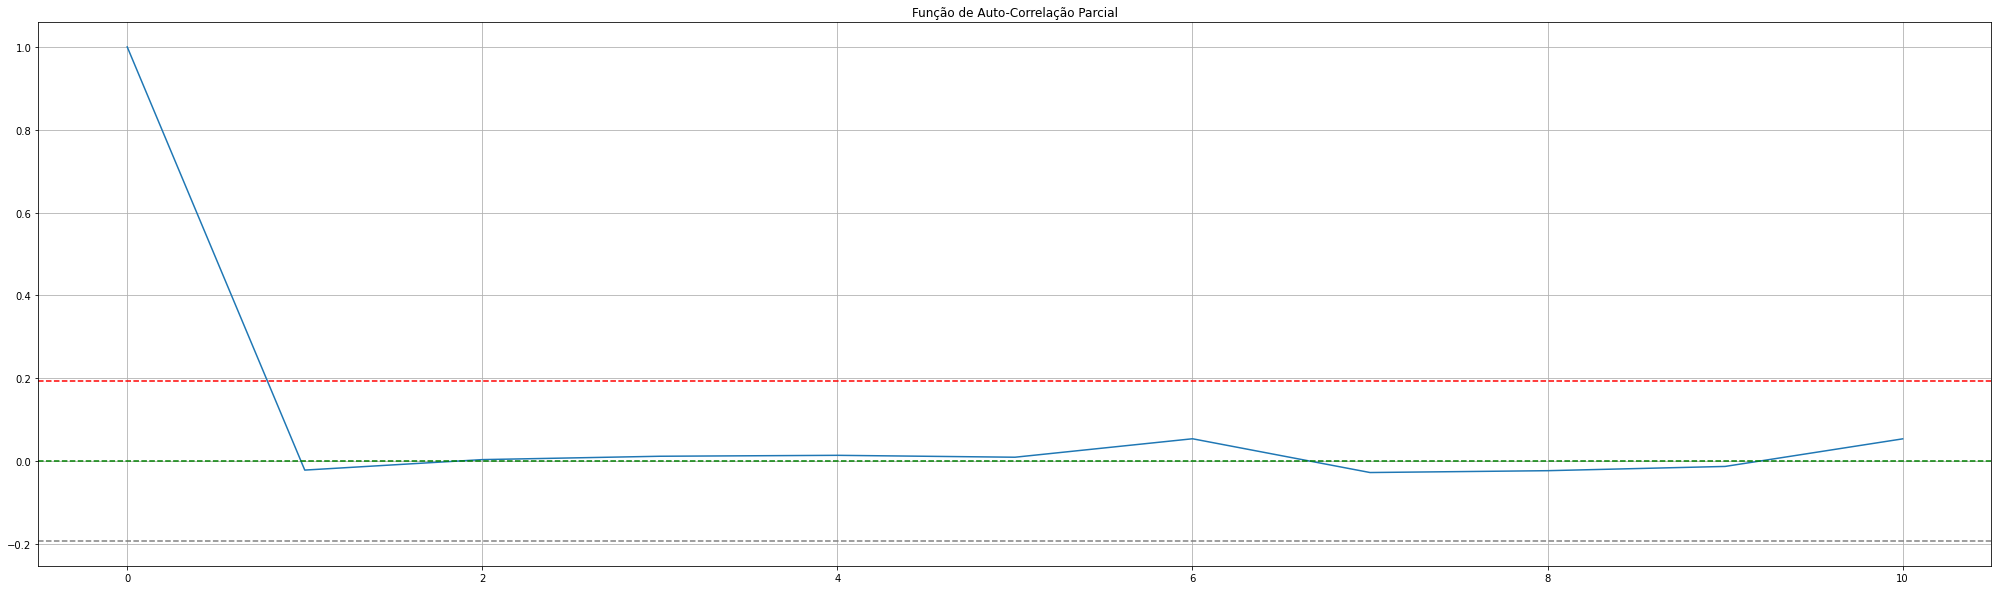

In [14]:
#Plot de Função de Auto-Correlação Parcial
plt.figure(figsize=(35,10))

plt.plot(np.arange(pacf(lnamm, nlags=10).shape[0]),pacf(lnamm, nlags=10))

# Valor de Confiança Superior
plt.axhline(y=0, linestyle='--', c='green')
#Inferior do intervalo de confiança
plt.axhline(y= -10/np.sqrt(len(lnamm)), linestyle='--', c='gray')

plt.axhline(y= 10/np.sqrt(len(lnamm)), linestyle='--', c='red')

plt.title('Função de Auto-Correlação Parcial')
plt.grid()
plt.show()

- A Curva PACF tende a 0 quando o valor de atraso (Lag) está entre 1 e 2. Logo o valor ótimo de p pode ser 1 ou 2.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                 2682
Model:                 ARIMA(1, 2, 6)   Log Likelihood                6723.890
Date:                Fri, 04 Mar 2022   AIC                         -13431.780
Time:                        15:49:31   BIC                         -13384.631
Sample:                    09-18-2014   HQIC                        -13414.723
                         - 01-20-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9987      0.002   -453.865      0.000      -1.003      -0.994
ma.L1         -1.0213      0.079    -12.888      0.000      -1.177      -0.866
ma.L2         -0.9720      0.159     -6.115      0.000      -1.284      -0.660
ma.L3          1.0265      0.087     11.803      0.000       0.856       1.197
ma.L4         -0.0358      0.026     -1.382      0.167      -0.087       0.015
ma.L5         -0.0052      0.024     -0.212      0.832      -0.053       0.043
ma.L6          0.0078      0.017      0.457      0.647      -0.026       0.041
sigma2         0.0004   2.86e-05     13.440      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             13954.19
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

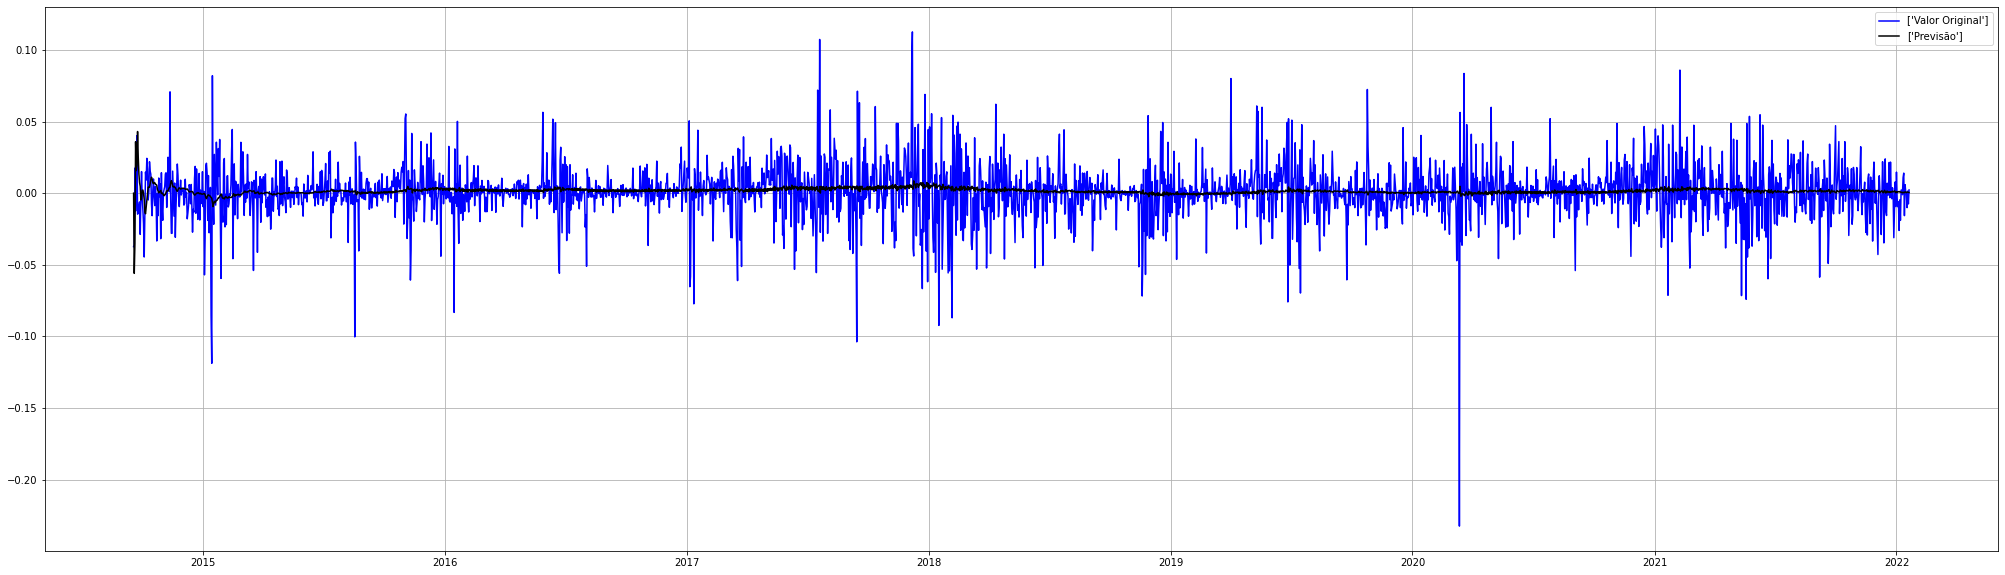

In [15]:
Arima = ARIMA(lnamm, order=(1,2,6))
Ar = Arima.fit()

plt.figure(figsize=(35,10))
plt.plot(lnamm, label=['Valor Original'], c='b')
plt.plot(Ar.fittedvalues, c='black', label=["Previsão"])
plt.legend()
plt.grid()

display(Ar.summary())

- Nota-se que o modelo ARIMA se ajusta bem aos dados de séries temporais com valores quase perfeitos. Agora faremos previsões de dados futuras com o mocelo treinado

In [16]:
# Previsões 
datas_futuras = [df.index[-1] + DateOffset(days=x) for x in range(0,1)]
datas_futuras_df = pd.DataFrame(index=datas_futuras[1:], columns=df.columns)

datas_futuras_df.tail()

prev_df = pd.concat([df,datas_futuras_df])
prev_df.shape

(2683, 1)

In [17]:
Ar.predict(start=2500, end=2600, dynamic=True)

2021-07-23    0.000600
2021-07-24    0.001314
2021-07-25    0.000754
2021-07-26    0.001023
2021-07-27    0.000730
                ...   
2021-10-27    0.000787
2021-10-28    0.001046
2021-10-29    0.000788
2021-10-30    0.001047
2021-10-31    0.000789
Freq: D, Name: predicted_mean, Length: 101, dtype: float64

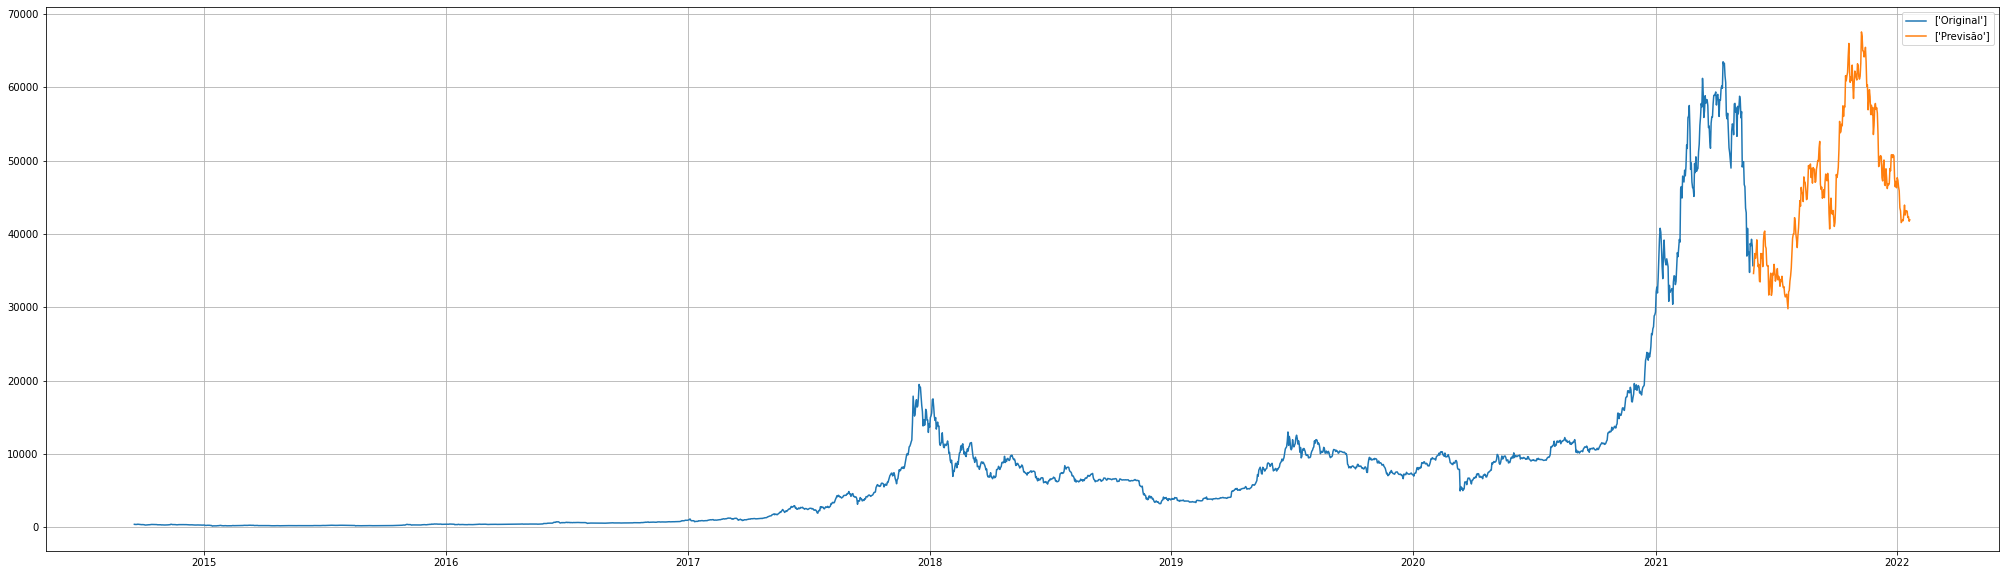

In [21]:
# Previsões futuras utilizando modelo previamente treinado

datas_futuras=[df.index[-1] + DateOffset(months = x ) for x in range(0,24)]
prev_df = pd.DataFrame(index= datas_futuras[1:], columns=df.columns)

prev_df.tail()

prev_df= pd.concat([df, prev_df])

prev_df['Price'] += Ar.predict(start=0, end=2683, dynamic=True)

#Plot Gráfico dos dados
plt.figure(figsize=(35,10))
plt.plot(prev_df['Price'][:-260], label=['Original'])
plt.plot((prev_df['Price'][-260:] + (1.08* mm.mean()[0])),label=['Previsão'])
plt.grid()
plt.legend()
plt.show()

- Em análise prévia, o modelo parece ser preciso pois captura a maior parte da sazonalidade e possíveis tendências nos dados da Série Temporal.

## Considerações finais:

- Fica claro pela análise gráfica, que os dados apresentam uma tendência ascendente e alguma sazonalidade. O que foi confirmado estatísticamente utilizando o Teste de Dicky-Fuller.
- A série temporal, como era explosiva, foi submetida a decomposição utilizando média móvel para encontrar certa estacionaridade.
- Os valores de 'p' & 'q' foram extraídos através das curvas ACF (Função de Auto-Correlação) e PACF (Função de Auto-Correlação parcial) para a utilização do método ARIMA.
- O Modelo foi então construído utilizando os valores ótimos de 'p' & 'q'.
- Finalmente, o modelo previamente treinado foi utilizado na previsão de preços futuros para a criptomoeda.

<<<-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------->>>

##### Estudo baseado no brilhante modelo <b> "Bitcoin Prices Forecast - (Top ML Model)"</b> <p> Desenvolvido por: <b> M Yasser H </b> e disponibilizado na plataforma <b> Kaggle